In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [4]:
x = df.model.values
y = df.selling_price.values

In [5]:
x

array([-1.12568266, -0.3332271 , -0.78980745, ..., -0.4486842 ,
        0.32802721,  1.03651397])

In [6]:
y

array([-1.11104589, -0.22394353, -0.91505816, ..., -0.48182212,
        1.16860087,  1.11702515])

In [7]:
#we got the error because it is asking for 2d array but we are giving 1d array
linear = LinearRegression()
linear.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.12568266 -0.3332271  -0.78980745 ... -0.4486842   0.32802721
  1.03651397].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)

In [9]:
linear.fit(x,y)

LinearRegression()

In [10]:
b = linear.intercept_
w = linear.coef_
print(w,b)

[[0.96505112]] [-1.18731936e-16]


In [11]:
y_hat= linear.predict(x)
linear.score(x,y)

0.9313236629576508

Assumption 01 - Linear Relationship between input and Target Varible.

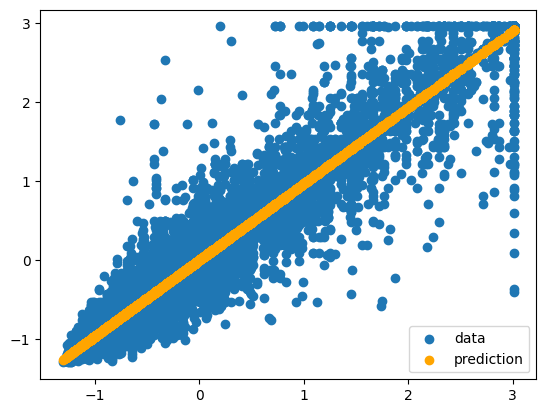

In [12]:
fig = plt.figure()
plt.scatter(x, y, label='data')
plt.scatter(x, y_hat, color='orange',label='prediction')
plt.legend()
plt.show()

Build model using all the columns

In [13]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

Assumption 02 - No Multicollinerity <br>
Inflate our weight by doubling Effect.

In [15]:
X.corr()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
year,1.000000,-0.310288,0.262772,-0.054552,0.074124,-1.000000,-0.009793,0.335715,-0.017124,0.063389,0.026316,0.004328,-0.072595,-0.025883,-0.108357,-0.002936,0.023967
km_driven,-0.310288,1.000000,-0.090059,0.169491,0.007457,0.310288,0.007530,-0.072604,0.091550,-0.049455,0.249679,-0.002327,0.014153,-0.249359,0.084569,-0.136180,0.151401
mileage,0.262772,-0.090059,1.000000,-0.586985,-0.473775,-0.262772,-0.362006,-0.321297,0.069013,0.027321,0.108808,0.228299,-0.023325,-0.159073,0.263190,0.371743,-0.379429
engine,-0.054552,0.169491,-0.586985,1.000000,0.791340,0.054552,0.589685,0.662828,-0.113243,-0.051005,0.453970,-0.001711,-0.049141,-0.425312,-0.368639,-0.517424,0.515238
max_power,0.074124,0.007457,-0.473775,0.791340,1.000000,-0.074124,0.711360,0.785750,-0.195152,-0.031343,0.261586,-0.002934,-0.052945,-0.231222,-0.543705,-0.225431,0.194063
age,-1.000000,0.310288,-0.262772,0.054552,-0.074124,1.000000,0.009793,-0.335715,0.017124,-0.063389,-0.026316,-0.004328,0.072595,0.025883,0.108357,0.002936,-0.023967
make,-0.009793,0.007530,-0.362006,0.589685,0.711360,0.009793,1.000000,0.761092,-0.192484,-0.031896,0.245333,0.008518,-0.024486,-0.229727,-0.563811,-0.105414,0.073579
model,0.335715,-0.072604,-0.321297,0.662828,0.785750,-0.335715,0.761092,1.000000,-0.194221,-0.022854,0.343207,0.019431,-0.054060,-0.321073,-0.596334,-0.235237,0.223754
Individual,-0.017124,0.091550,0.069013,-0.113243,-0.195152,0.017124,-0.192484,-0.194221,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523
Trustmark Dealer,0.063389,-0.049455,0.027321,-0.051005,-0.031343,-0.063389,-0.031896,-0.022854,-0.078776,1.000000,-0.083469,-0.001977,-0.005600,0.070763,0.013651,0.026990,-0.030273


In [17]:
cols = ['engine','model','max_power','make','mileage','Manual','Diesel','Petrol','LPG','km_driven','Electric','Individual','Trustmark Dealer','5']
new_X = df[cols]
new_X

,engine,model,max_power,make,mileage,Manual,Diesel,Petrol,LPG,km_driven,Electric,Individual,Trustmark Dealer,5
0,-1.310754,-1.125683,-1.157780,-0.433854,0.045745,0.495818,-0.985275,1.024622,-0.056917,1.195828,-0.020095,1.248892,-0.098382,0.444503
1,-0.537456,-0.333227,-0.360203,-0.327501,-0.140402,0.495818,-0.985275,1.024622,-0.056917,-0.737872,-0.020095,1.248892,-0.098382,0.444503
2,-0.537456,-0.789807,-0.404885,-0.327501,-0.582501,0.495818,-0.985275,1.024622,-0.056917,0.035608,-0.020095,1.248892,-0.098382,0.444503
3,-0.921213,-0.905265,-0.693085,-0.433854,0.329620,0.495818,-0.985275,1.024622,-0.056917,-0.409143,-0.020095,1.248892,-0.098382,0.444503
4,0.042999,-0.013096,0.010435,-0.246579,0.760085,0.495818,1.014945,-0.975970,-0.056917,-0.544502,-0.020095,-0.800710,-0.098382,0.444503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,-0.215410,0.091865,-0.694202,0.724475,0.950886,0.495818,1.014945,-0.975970,-0.056917,0.218923,-0.020095,-0.800710,-0.098382,0.444503
19816,-0.198054,0.112857,-0.156899,-0.433854,-0.466159,0.495818,-0.985275,1.024622,-0.056917,-0.776546,-0.020095,-0.800710,-0.098382,-2.249703
19817,0.042999,-0.448684,0.120577,-0.240799,0.380810,0.495818,1.014945,-0.975970,-0.056917,0.170967,-0.020095,-0.800710,-0.098382,0.444503
19818,1.356256,0.328027,0.935579,0.123346,-0.815185,0.495818,1.014945,-0.975970,-0.056917,72.355997,-0.020095,-0.800710,-0.098382,-2.249703


In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(new_X,Y, test_size=0.2, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
mld1 = LinearRegression()
mld1.fit(x_train, y_train)

LinearRegression()

In [21]:
print(mld1.intercept_)
print(mld1.coef_)

-0.001486368200519866
[ 1.91839097e-02  9.12998331e-01  2.20453024e-02  5.40777133e-03
  3.98388922e-03 -7.80899350e-03  1.07530019e-02 -1.54943424e-03
  7.51903671e-05 -3.77233349e-02  2.33352393e-04 -1.23468313e-02
  2.57434603e-03 -8.05620957e-03]


In [22]:
#check how good is your model using r2. it called a good model if it is closer to 1.
print("Train Score : ",mld1.score(x_train, y_train)) #Train R2 Score
print("Test Score : ", mld1.score(x_test, y_test))   #Test R2 Score

Train Score :  0.9317927627070869
Test Score :  0.9395593505592938


Assumption 03 - Normality of Error. <br>
> --> may be x and y are not linearly seperable may be exponsial etc. <br>
--> may outliers is persent so that our error distributon is skewed.

Assumption 04 - No Outliers

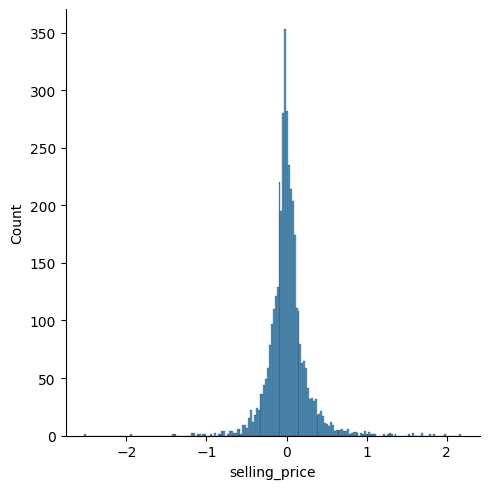

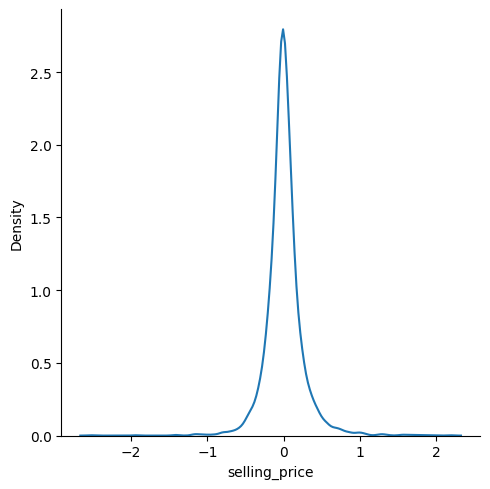

In [23]:
y_hat = mld1.predict(x_test)
error = y_test - y_hat
sns.displot(error)
sns.displot(error, kind = 'kde')

In [ ]:
#Another way to determine how good is your model is by finding the error. it should be as small as it can.
np.mean(error)

0.005699795987965588

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

0.054180618085069104

Assumption 05 - No Autocorrelation; should not show any pattern between error vs actural. <br>
Assumption 06 - Homoscedasticity; Spread of error is like constant accros the predicted value.
>One plot can tells about both Autocorrelation and Homescedasticity. <br>
Residual/error vs Actual Scatter plot

Text(0, 0.5, 'Errors')

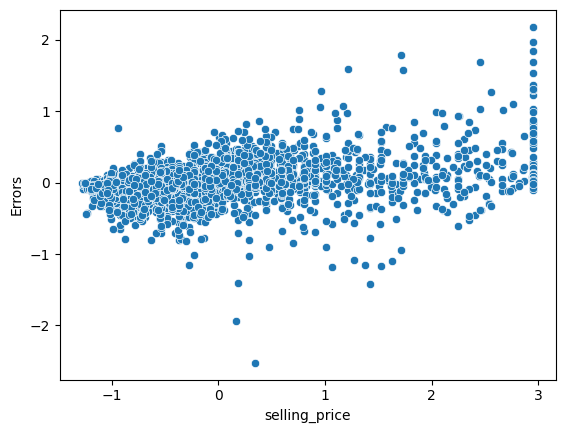

In [26]:
sns.scatterplot(x=y_test, y=error)
plt.ylabel('Errors')

Autocorrelation - it is not showing any kind of pattern neither incresing nor decresing. it is spread all over. <br>
homoscedasticity - the spread of the error is constant accros the plot. 